Adding library imports 

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os
import glob
import random

Reading the initial strawberry files. Matplotlib's default color scheme BGR, so the initial reading
(as shown here) is reading the jpg color code's in reverse order. The image should be displayed as follows, but the output is incorrect.   

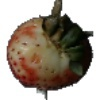



Here the image is updated to the color colorscheme using cvtColor

In [221]:
# displaying images with updated RBG color scheme 
#colorFixImg = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
#plt.imshow(colorFixImg)


In [222]:
# import shutil
path = "/Users/Bobby/Fall2020/Artificial Intelligence/Semester Project/fruits-360/Training/*/*"
files = []
[files.extend(glob.glob(path + '*.jpg'))]

# shuffle pitcures
random.shuffle(files)


In [227]:
# label the strawberry images
IMG_SIZE = 100
labels = []
images = []
strawCount = 0
image_count = 0
print('Length of files:', len(files))
for file in files:
    if 'Strawberry' in file or 'strawberry' in file:
        labels.append(1)
        strawCount += 1
    else: labels.append(0)    
    image = cv2.imread(os.path.join(path, file))
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
    images.append(image)


images = np.array(images)
labels = np.array(labels)
labels.resize(len(labels), 1)
print('Number of Strawberry Images:', strawCount)
print('Number of Images:', len(images))
print('Shape of Images:', images.shape)
print('Shape of Labels:', labels.shape)
#plt.imshow(images[0:10])

Length of files: 2677
Number of Strawberry Images: 946
Number of Images: 2677
Shape of Images: (2677, 100, 100, 3)
Shape of Labels: (2677, 1)


In [229]:
# creating the dataframe
'''
from skimage.util import img_as_float
new_Images = []
dim =100
for i in range(0,len(images2)):
   # m_rgb = cv2.cvtColor(images2[i], cv2.COLOR_BGR2RGB)
    image = np.asarray(images2[i],dtype=object)
    new_Images.append((image,labels[i]))
df = pd.DataFrame(new_Images, columns=['Image','Label'])
X = np.array(df['Image'])
y = np.array(df['Label'])
df.head()
'''



"\nfrom skimage.util import img_as_float\nnew_Images = []\ndim =100\nfor i in range(0,len(images2)):\n   # m_rgb = cv2.cvtColor(images2[i], cv2.COLOR_BGR2RGB)\n    image = np.asarray(images2[i],dtype=object)\n    new_Images.append((image,labels[i]))\ndf = pd.DataFrame(new_Images, columns=['Image','Label'])\nX = np.array(df['Image'])\ny = np.array(df['Label'])\ndf.head()\n"

In [139]:
# save the data
import pickle
'''
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()
'''

In [141]:
'''
pickle_in = open('images.pickle', 'rb')
images = pickle.load(pickle_in)
pickle_in = open('labels.pickle', 'rb')
labels = pickle.load(pickle_in)
'''

In [244]:
# train-test split
from sklearn.model_selection import train_test_split
from skimage.feature import hog
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 0)
#print('X_train shape:', X_train.shape) 
#print('y_train shape:', y_train.shape)

#print('X_train type:', type(X_train))
#print('y_train type:', type(y_train))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [251]:
# Convolutional Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

#X = tf.convert_to_tensor(X, np.float32)

model.fit(X_train, y_train, batch_size = 32, epochs = 3, validation_data = (X_test, y_test))


TypeError: unsupported operand type(s) for -: 'float' and 'tuple'